<a href="https://colab.research.google.com/github/reyaput/Data/blob/main/problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [64]:
drive_url = "https://drive.google.com/uc?export=download&id=19Bej06r2bMoeK2l0Lw-uX8alYqcrJeIu"

data = pd.read_csv(drive_url)

conn = sq.connect('my_database.db')

data.to_sql('my_table', conn, index=False, if_exists='replace')

sql_query = "SELECT * FROM my_table"
sql_result = pd.read_sql(sql_query, conn)

display(sql_result)

data.info()

missing_val = data.isnull().sum()
print(missing_val)

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1960,54922.0
1,Aruba,ABW,1961,55578.0
2,Aruba,ABW,1962,56320.0
3,Aruba,ABW,1963,57002.0
4,Aruba,ABW,1964,57619.0
...,...,...,...,...
16925,Zimbabwe,ZWE,2019,15271368.0
16926,Zimbabwe,ZWE,2020,15526888.0
16927,Zimbabwe,ZWE,2021,15797210.0
16928,Zimbabwe,ZWE,2022,16069056.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16930 entries, 0 to 16929
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  16930 non-null  object 
 1   Country Code  16930 non-null  object 
 2   Year          16930 non-null  int64  
 3   Value         16930 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 529.2+ KB
Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64


In [65]:
display(data['Country Name'].unique())

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [66]:
countries = [
    'Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda',
    'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
    'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
    'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
    'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czechia',
    'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain',
    'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faroe Islands', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
    'Ghana', 'Gibraltar', 'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala',
    'Guam', 'Guyana', 'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Isle of Man', 'India',
    'Ireland', 'Iran, Islamic Rep.', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan',
    'Kenya', 'Kyrgyz Republic', 'Cambodia', 'Kiribati', 'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Lao PDR', 'Lebanon', 'Liberia',
    'Libya', 'St. Lucia', 'Liechtenstein', 'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembourg', 'Latvia', 'Macao SAR, China', 'St. Martin (French part)',
    'Morocco', 'Monaco', 'Moldova', 'Madagascar', 'Maldives', 'Mexico', 'Marshall Islands', 'North Macedonia', 'Mali', 'Malta',
    'Myanmar', 'Montenegro', 'Mongolia', 'Northern Mariana Islands', 'Mozambique', 'Mauritania', 'Mauritius', 'Malawi', 'Malaysia', 'Namibia',
    'New Caledonia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands', 'Norway', 'Nepal', 'Nauru', 'New Zealand', 'Oman',
    'Pakistan', 'Panama', 'Peru', 'Philippines', 'Palau', 'Papua New Guinea', 'Poland', 'Puerto Rico', "Korea, Dem. People's Rep.", 'Portugal',
    'Paraguay', 'West Bank and Gaza', 'French Polynesia', 'Qatar', 'Romania', 'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Sudan', 'Senegal',
    'Singapore', 'Solomon Islands', 'Sierra Leone', 'El Salvador', 'San Marino', 'Somalia', 'Serbia', 'South Sudan', 'Sao Tome and Principe', 'Suriname',
    'Slovak Republic', 'Slovenia', 'Sweden', 'Eswatini', 'Sint Maarten (Dutch part)', 'Seychelles', 'Syrian Arab Republic', 'Turks and Caicos Islands', 'Chad', 'Togo',
    'Thailand', 'Tajikistan', 'Turkmenistan', 'Timor-Leste', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkiye', 'Tuvalu', 'Tanzania',
    'Uganda', 'Ukraine', 'Uruguay', 'United States', 'Uzbekistan', 'St. Vincent and the Grenadines', 'Venezuela, RB', 'British Virgin Islands', 'Virgin Islands (U.S.)', 'Viet Nam',
    'Vanuatu', 'Samoa', 'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe'
]

initial_rows = data.shape[0]
data = data[data['Country Name'].isin(countries)]
final_rows = data.shape[0]

print(f"Jumlah baris sebelum filter: {initial_rows}")
print(f"Jumlah baris setelah filter (hanya negara valid): {final_rows}")

display(data)

Jumlah baris sebelum filter: 16930
Jumlah baris setelah filter (hanya negara valid): 13858


,Country Name,Country Code,Year,Value
0,Aruba,ABW,1960,54922.0
1,Aruba,ABW,1961,55578.0
2,Aruba,ABW,1962,56320.0
3,Aruba,ABW,1963,57002.0
4,Aruba,ABW,1964,57619.0
...,...,...,...,...
16925,Zimbabwe,ZWE,2019,15271368.0
16926,Zimbabwe,ZWE,2020,15526888.0
16927,Zimbabwe,ZWE,2021,15797210.0
16928,Zimbabwe,ZWE,2022,16069056.0


In [67]:
country_region = {
    "Aruba": "Latin America & Caribbean", "Afghanistan": "South Asia", "Angola": "Sub-Saharan Africa", "Albania": "Europe & Central Asia", "Andorra": "Europe & Central Asia",
    "United Arab Emirates": "Middle East & North Africa", "Argentina": "Latin America & Caribbean", "Armenia": "Europe & Central Asia", "American Samoa": "East Asia & Pacific",
    "Antigua and Barbuda": "Latin America & Caribbean", "Australia": "East Asia & Pacific", "Austria": "Europe & Central Asia", "Azerbaijan": "Europe & Central Asia",
    "Burundi": "Sub-Saharan Africa", "Belgium": "Europe & Central Asia", "Benin": "Sub-Saharan Africa", "Burkina Faso": "Sub-Saharan Africa", "Bangladesh": "South Asia",
    "Bulgaria": "Europe & Central Asia", "Bahrain": "Middle East & North Africa", "Bahamas, The": "Latin America & Caribbean", "Bosnia and Herzegovina": "Europe & Central Asia",
    "Belarus": "Europe & Central Asia", "Belize": "Latin America & Caribbean", "Bermuda": "North America", "Bolivia": "Latin America & Caribbean", "Brazil": "Latin America & Caribbean",
    "Barbados": "Latin America & Caribbean", "Brunei Darussalam": "East Asia & Pacific", "Bhutan": "South Asia", "Botswana": "Sub-Saharan Africa",
    "Central African Republic": "Sub-Saharan Africa", "Canada": "North America", "Switzerland": "Europe & Central Asia", "Channel Islands": "Europe & Central Asia",
    "Chile": "Latin America & Caribbean", "China": "East Asia & Pacific", "Cote d'Ivoire": "Sub-Saharan Africa", "Cameroon": "Sub-Saharan Africa", "Congo, Dem. Rep.": "Sub-Saharan Africa",
    "Congo, Rep.": "Sub-Saharan Africa", "Colombia": "Latin America & Caribbean", "Comoros": "Sub-Saharan Africa", "Cabo Verde": "Sub-Saharan Africa",
    "Costa Rica": "Latin America & Caribbean", "Cuba": "Latin America & Caribbean", "Curacao": "Latin America & Caribbean", "Cayman Islands": "Latin America & Caribbean",
    "Cyprus": "Europe & Central Asia", "Czechia": "Europe & Central Asia", "Germany": "Europe & Central Asia", "Djibouti": "Middle East & North Africa",
    "Dominica": "Latin America & Caribbean", "Denmark": "Europe & Central Asia", "Dominican Republic": "Latin America & Caribbean", "Algeria": "Middle East & North Africa",
    "Ecuador": "Latin America & Caribbean", "Egypt, Arab Rep.": "Middle East & North Africa", "Eritrea": "Sub-Saharan Africa", "Spain": "Europe & Central Asia",
    "Estonia": "Europe & Central Asia", "Ethiopia": "Sub-Saharan Africa", "Finland": "Europe & Central Asia", "Fiji": "East Asia & Pacific", "France": "Europe & Central Asia",
    "Faroe Islands": "Europe & Central Asia", "Micronesia, Fed. Sts.": "East Asia & Pacific", "Gabon": "Sub-Saharan Africa", "United Kingdom": "Europe & Central Asia",
    "Georgia": "Europe & Central Asia", "Ghana": "Sub-Saharan Africa", "Gibraltar": "Europe & Central Asia", "Guinea": "Sub-Saharan Africa", "Gambia, The": "Sub-Saharan Africa",
    "Guinea-Bissau": "Sub-Saharan Africa", "Equatorial Guinea": "Sub-Saharan Africa", "Greece": "Europe & Central Asia", "Grenada": "Latin America & Caribbean",
    "Greenland": "Europe & Central Asia", "Guatemala": "Latin America & Caribbean", "Guam": "East Asia & Pacific", "Guyana": "Latin America & Caribbean",
    "Hong Kong SAR, China": "East Asia & Pacific", "Honduras": "Latin America & Caribbean", "Croatia": "Europe & Central Asia", "Haiti": "Latin America & Caribbean",
    "Hungary": "Europe & Central Asia", "Indonesia": "East Asia & Pacific", "Isle of Man": "Europe & Central Asia", "India": "South Asia", "Ireland": "Europe & Central Asia",
    "Iran, Islamic Rep.": "Middle East & North Africa", "Iraq": "Middle East & North Africa", "Iceland": "Europe & Central Asia", "Israel": "Middle East & North Africa",
    "Italy": "Europe & Central Asia", "Jamaica": "Latin America & Caribbean", "Jordan": "Middle East & North Africa", "Japan": "East Asia & Pacific",
    "Kazakhstan": "Europe & Central Asia", "Kenya": "Sub-Saharan Africa", "Kyrgyz Republic": "Europe & Central Asia", "Cambodia": "East Asia & Pacific",
    "Kiribati": "East Asia & Pacific", "St. Kitts and Nevis": "Latin America & Caribbean", "Korea, Rep.": "East Asia & Pacific", "Kuwait": "Middle East & North Africa",
    "Lao PDR": "East Asia & Pacific", "Lebanon": "Middle East & North Africa", "Liberia": "Sub-Saharan Africa", "Libya": "Middle East & North Africa",
    "St. Lucia": "Latin America & Caribbean", "Liechtenstein": "Europe & Central Asia", "Sri Lanka": "South Asia", "Lesotho": "Sub-Saharan Africa",
    "Lithuania": "Europe & Central Asia", "Luxembourg": "Europe & Central Asia", "Latvia": "Europe & Central Asia", "Macao SAR, China": "East Asia & Pacific",
    "St. Martin (French part)": "Latin America & Caribbean", "Morocco": "Middle East & North Africa", "Monaco": "Europe & Central Asia", "Moldova": "Europe & Central Asia",
    "Madagascar": "Sub-Saharan Africa", "Maldives": "South Asia", "Mexico": "Latin America & Caribbean", "Marshall Islands": "East Asia & Pacific",
    "North Macedonia": "Europe & Central Asia", "Mali": "Sub-Saharan Africa", "Malta": "Middle East & North Africa", "Myanmar": "East Asia & Pacific",
    "Montenegro": "Europe & Central Asia", "Mongolia": "East Asia & Pacific", "Northern Mariana Islands": "East Asia & Pacific", "Mozambique": "Sub-Saharan Africa",
    "Mauritania": "Sub-Saharan Africa", "Mauritius": "Sub-Saharan Africa", "Malawi": "Sub-Saharan Africa", "Malaysia": "East Asia & Pacific", "Namibia": "Sub-Saharan Africa",
    "New Caledonia": "East Asia & Pacific", "Niger": "Sub-Saharan Africa", "Nigeria": "Sub-Saharan Africa", "Nicaragua": "Latin America & Caribbean",
    "Netherlands": "Europe & Central Asia", "Norway": "Europe & Central Asia", "Nepal": "South Asia", "Nauru": "East Asia & Pacific", "New Zealand": "East Asia & Pacific",
    "Oman": "Middle East & North Africa", "Pakistan": "South Asia", "Panama": "Latin America & Caribbean", "Peru": "Latin America & Caribbean",
    "Philippines": "East Asia & Pacific", "Palau": "East Asia & Pacific", "Papua New Guinea": "East Asia & Pacific", "Poland": "Europe & Central Asia",
    "Puerto Rico": "Latin America & Caribbean", "Korea, Dem. People's Rep.": "East Asia & Pacific", "Portugal": "Europe & Central Asia", "Paraguay": "Latin America & Caribbean",
    "West Bank and Gaza": "Middle East & North Africa", "French Polynesia": "East Asia & Pacific", "Qatar": "Middle East & North Africa", "Romania": "Europe & Central Asia",
    "Russian Federation": "Europe & Central Asia", "Rwanda": "Sub-Saharan Africa", "Saudi Arabia": "Middle East & North Africa", "Sudan": "Middle East & North Africa",
    "Senegal": "Sub-Saharan Africa", "Singapore": "East Asia & Pacific", "Solomon Islands": "East Asia & Pacific", "Sierra Leone": "Sub-Saharan Africa",
    "El Salvador": "Latin America & Caribbean", "San Marino": "Europe & Central Asia", "Somalia": "Sub-Saharan Africa", "Serbia": "Europe & Central Asia",
    "South Sudan": "Sub-Saharan Africa", "Sao Tome and Principe": "Sub-Saharan Africa", "Suriname": "Latin America & Caribbean", "Slovak Republic": "Europe & Central Asia",
    "Slovenia": "Europe & Central Asia", "Sweden": "Europe & Central Asia", "Eswatini": "Sub-Saharan Africa", "Sint Maarten (Dutch part)": "Latin America & Caribbean",
    "Seychelles": "Sub-Saharan Africa", "Syrian Arab Republic": "Middle East & North Africa", "Turks and Caicos Islands": "Latin America & Caribbean", "Chad": "Sub-Saharan Africa",
    "Togo": "Sub-Saharan Africa", "Thailand": "East Asia & Pacific", "Tajikistan": "Europe & Central Asia", "Turkmenistan": "Europe & Central Asia",
    "Timor-Leste": "East Asia & Pacific", "Tonga": "East Asia & Pacific", "Trinidad and Tobago": "Latin America & Caribbean", "Tunisia": "Middle East & North Africa",
    "Turkiye": "Europe & Central Asia", "Tuvalu": "East Asia & Pacific", "Tanzania": "Sub-Saharan Africa", "Uganda": "Sub-Saharan Africa", "Ukraine": "Europe & Central Asia",
    "Uruguay": "Latin America & Caribbean", "United States": "North America", "Uzbekistan": "Europe & Central Asia", "St. Vincent and the Grenadines": "Latin America & Caribbean",
    "Venezuela, RB": "Latin America & Caribbean", "British Virgin Islands": "Latin America & Caribbean", "Virgin Islands (U.S.)": "Latin America & Caribbean",
    "Viet Nam": "East Asia & Pacific", "Vanuatu": "East Asia & Pacific", "Samoa": "East Asia & Pacific", "Kosovo": "Europe & Central Asia",
    "Yemen, Rep.": "Middle East & North Africa", "South Africa": "Sub-Saharan Africa", "Zambia": "Sub-Saharan Africa", "Zimbabwe": "Sub-Saharan Africa"
}

data['Region'] = data['Country Name'].map(country_region).fillna('Unknown')

display(data)

,Country Name,Country Code,Year,Value,Region
0,Aruba,ABW,1960,54922.0,Latin America & Caribbean
1,Aruba,ABW,1961,55578.0,Latin America & Caribbean
2,Aruba,ABW,1962,56320.0,Latin America & Caribbean
3,Aruba,ABW,1963,57002.0,Latin America & Caribbean
4,Aruba,ABW,1964,57619.0,Latin America & Caribbean
...,...,...,...,...,...
16925,Zimbabwe,ZWE,2019,15271368.0,Sub-Saharan Africa
16926,Zimbabwe,ZWE,2020,15526888.0,Sub-Saharan Africa
16927,Zimbabwe,ZWE,2021,15797210.0,Sub-Saharan Africa
16928,Zimbabwe,ZWE,2022,16069056.0,Sub-Saharan Africa


In [74]:
data['Value'] = data['Value'].round().astype('Int64')

display(data.head())
data.info()

,Country Name,Country Code,Year,Value,Region
0,Aruba,ABW,1960,54922,Latin America & Caribbean
1,Aruba,ABW,1961,55578,Latin America & Caribbean
2,Aruba,ABW,1962,56320,Latin America & Caribbean
3,Aruba,ABW,1963,57002,Latin America & Caribbean
4,Aruba,ABW,1964,57619,Latin America & Caribbean


<class 'pandas.core.frame.DataFrame'>
Index: 13858 entries, 0 to 16929
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  13858 non-null  object
 1   Country Code  13858 non-null  object
 2   Year          13858 non-null  int64 
 3   Value         13858 non-null  Int64 
 4   Region        13858 non-null  object
dtypes: Int64(1), int64(1), object(3)
memory usage: 663.1+ KB


In [72]:
population_2023 = data[data['Year'] == 2023]['Value'].sum()
print(f"Total populasi di tahun 2023: {population_2023}")

max_population_country = data[data['Year'] == 2023].loc[data[data['Year'] == 2023]['Value'].idxmax()]['Country Name']
max_population_value = data[data['Year'] == 2023]['Value'].max()
print(f"Negara dengan populasi tertinggi di tahun 2023: {max_population_country} dengan populasi {max_population_value}")

min_population_country = data[data['Year'] == 2023].loc[data[data['Year'] == 2023]['Value'].idxmin()]['Country Name']
min_population_value = data[data['Year'] == 2023]['Value'].min()
print(f"Negara dengan populasi terendah di tahun 2023: {min_population_country} dengan populasi {min_population_value}")

Total populasi di tahun 2023: 8038502718
Negara dengan populasi tertinggi di tahun 2023: India dengan populasi 1438069596
Negara dengan populasi terendah di tahun 2023: Tuvalu dengan populasi 9816


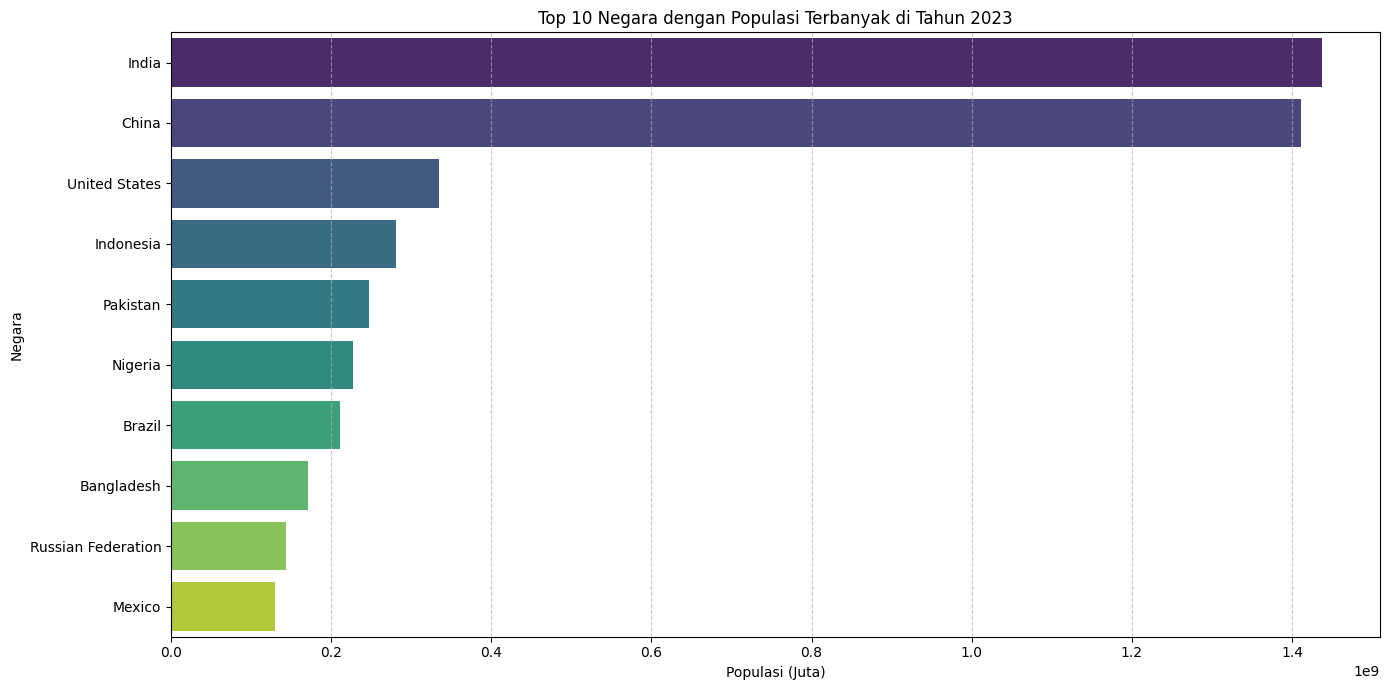

In [78]:
data_2023 = data[data['Year'] == 2023]

top_10_countries = data_2023.sort_values(by='Value', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='Value', y='Country Name', data=top_10_countries, palette='viridis', hue='Country Name', legend=False)

plt.title('Top 10 Negara dengan Populasi Terbanyak di Tahun 2023')
plt.xlabel('Populasi (Juta)')
plt.ylabel('Negara')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Rata-rata pertumbuhan populasi per tahun di Indonesia: 1.86%


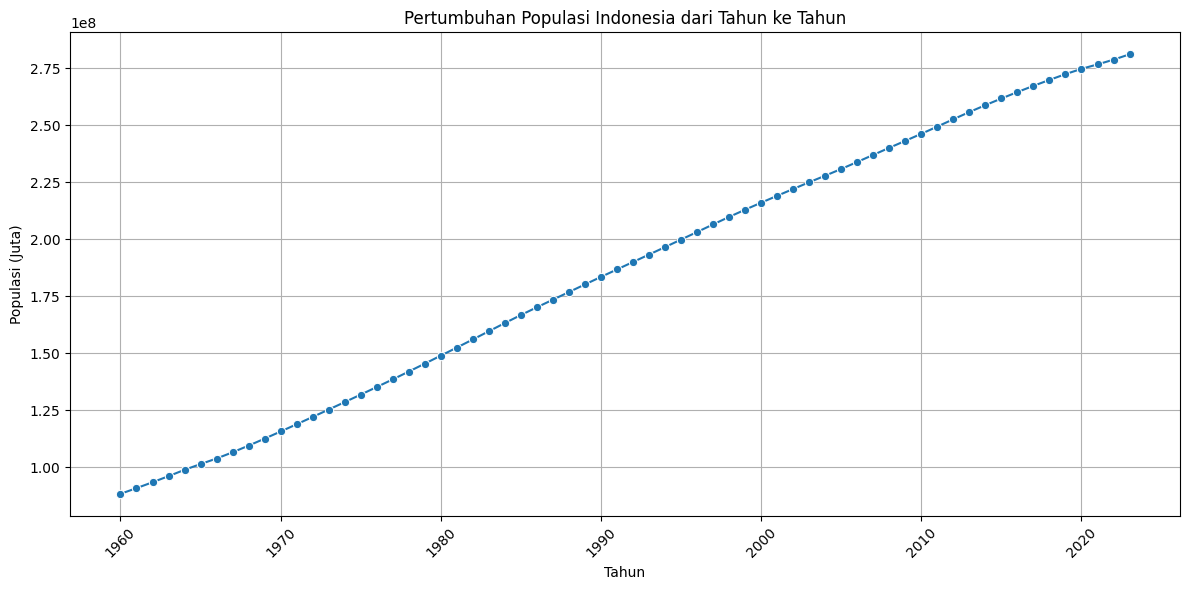

In [82]:
indonesia_data = data[data['Country Name'] == 'Indonesia'].sort_values(by='Year')

indonesia_data['Growth'] = indonesia_data['Value'].diff()
indonesia_data['Growth Rate (%)'] = (indonesia_data['Growth'] / indonesia_data['Value'].shift(1)) * 100

average_growth_rate = indonesia_data['Growth Rate (%)'].mean()

print(f"Rata-rata pertumbuhan populasi per tahun di Indonesia: {average_growth_rate:.2f}%")

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', data=indonesia_data, marker='o')

plt.title('Pertumbuhan Populasi Indonesia dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Populasi (Juta)')
plt.grid(True)
plt.xticks(rotation=45)

plt.gca()

plt.tight_layout()
plt.show()

**Insight**

Dari data yang digunakan, diketahui bahwa dataset ini berisi pertumbuhan populasi negara-negara di dunia dari tahun 1960 hingga 2023. Pada awalnya, masih ada banyak baris data yang bercampur dengan data kawasan/region, sehingga saya menghapus entri yang bukan negara dan menambahkan satu kolom baru bernama region.

Pada tahun 2023, total populasi seluruh negara dalam dataset mencapai 8.038.502.718 jiwa. Negara dengan populasi terbesar adalah India dengan 1.438.069.596 jiwa, sedangkan negara dengan populasi terkecil adalah Tuvalu dengan 9.816 jiwa.

Sepuluh negara dengan populasi terbesar pada tahun 2023 adalah: India, China, United States, Indonesia, Pakistan, Nigeria, Brazil, Bangladesh, Russian Federation, dan Mexico. Untuk analisis pertumbuhan tahunan, saya memilih Indonesia, yang memiliki rata-rata pertumbuhan populasi sekitar 1,86% per tahun. Pada tahun 2023, jumlah penduduk Indonesia tercatat lebih dari 275 juta jiwa.